La mano es de un adolescente
(Mujeres: 13 años a 15 años)(Hombres: 14 años a 16 años)
Distancia entre el punto A y el punto 4: 24.37 mm


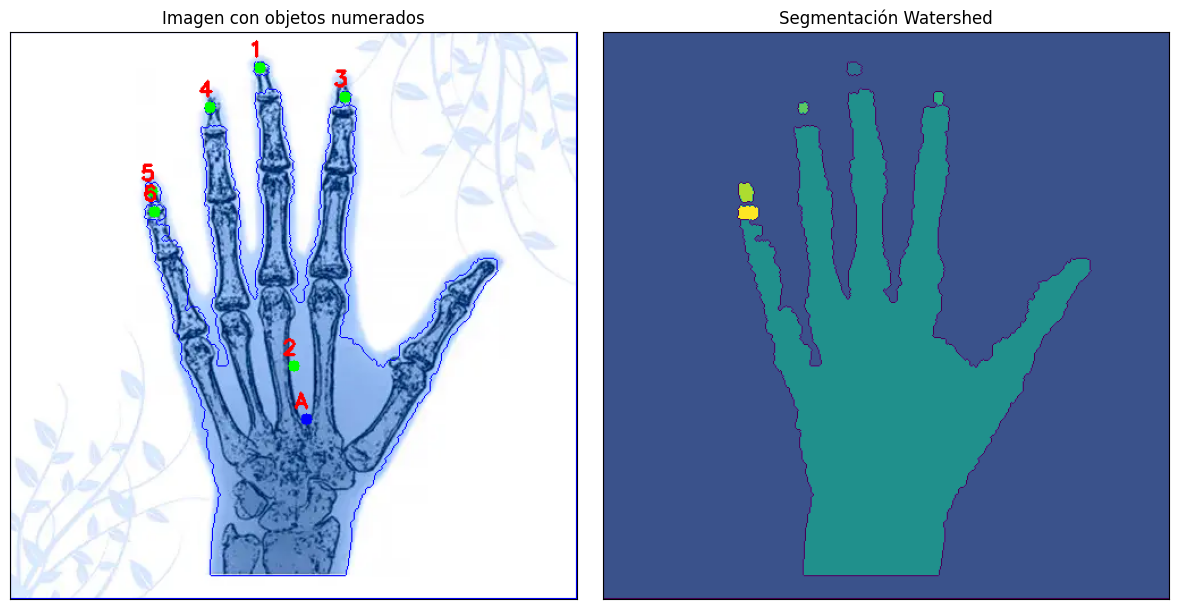

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
image_url = "/mano adolescentotes.webp"
img = cv2.imread(image_url)

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar el algoritmo de Watershed
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
sure_fg = cv2.erode(opening, kernel, iterations=2)
sure_fg = cv2.dilate(sure_fg, kernel, iterations=3)

unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

# Definir la medida conocida en mm y la medida en píxeles
known_width_mm = 42.33  # ancho conocido en mm (ajustar según la referencia de tu imagen)
known_width_px = 500  # ancho conocido en píxeles (medir usando OpenCV o una herramienta)
px_to_mm = known_width_mm / known_width_px

# Extraer los centroides de los puntos 1, 2, 3, y 9 si están presentes
centroids = []
for i in range(2, markers.max() + 1):
    mask = np.uint8(markers == i)
    M = cv2.moments(mask)
    if M["m00"] != 0:
        # Calcular el centroide
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroids.append((cX, cY))

        # Dibujar el número del objeto en el centroide
        cv2.circle(img, (cX, cY), 5, (0, 255, 0), -1)
        cv2.putText(img, f'{i-1}', (cX - 10, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Verificar si existen al menos los puntos necesarios
if len(centroids) >= 4:
    (x1, y1) = centroids[0]  # Punto 1
    (x2, y2) = centroids[1]  # Punto 2
    (x3, y3) = centroids[2]  # Punto 3
    (x4, y4) = centroids[3]  # Punto 4

    # Calcular distancia entre el punto 2 y el punto 3 en píxeles y convertir a mm
    distance_2_3_px = np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2)
    distance_2_3_mm = distance_2_3_px * px_to_mm

    # Determinar la categoría de la mano y calcular distancias adicionales
    if round(distance_2_3_mm, 2) == 0.91:
        # Calcular la distancia entre el punto 1 y el punto 9 si hay 9 puntos
        if len(centroids) >= 9:

            (x9, y9) = centroids[8]  # Punto 9
            distance_1_9_px = np.sqrt((x9 - x1) ** 2 + (y9 - y1) ** 2)
            distance_1_9_mm = distance_1_9_px * px_to_mm

            # Calcular la distancia de 0.7 mm en píxeles
            offset_px = 0.7 / px_to_mm

            # Coordenadas del nuevo punto "A" 2 mm más abajo de punto 2
            xA, yA = int(x9 + offset_px), y9

            # Dibujar el nuevo punto y etiquetarlo como "A"
            cv2.circle(img, (xA, yA), 5, (255, 0, 0), -1)
            cv2.putText(img, "A", (xA - 10, yA - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

            # Calcular la distancia entre el punto A y el punto 1
            distance_A_1_px = np.sqrt((x1 - xA) ** 2 + (y1 - yA) ** 2)
            distance_A_1_mm = distance_A_1_px * px_to_mm
            print("La mano es de un neonato")
            print("(Mujeres: Desde el nacimiento hasta los 10 meses)(Hombres: Desde el nacimiento hasta los 14 meses)")
            hand_type = f"Distancia entre el punto A y el punto 1: {distance_A_1_mm:.2f} mm"

        else:
            hand_type = "la mano es de un neonato, pero no se encontraron suficientes puntos para calcular la distancia entre el punto 1 y el punto 9."

    elif round(distance_2_3_mm, 2) == 21.74:
        print("La mano es de un bebé ")
        print("(Mujeres: 10 meses a 2 años)(Hombres: 14 meses a 3 años)")
        hand_type = f"Distancia entre el punto 2 y el punto 3: {distance_2_3_mm:.2f} mm"

    elif round(distance_2_3_mm, 2) == 22.98:
        print("La mano es de un niño")
        print("(Mujeres: 2 años a 7 años)(Hombres: 3 años a 9 años)")
        hand_type = f"Distancia entre el punto 2 y el punto 3: {distance_2_3_mm:.2f} mm"

    elif round(distance_2_3_mm, 2) == 20.22:
        # Añadir 2 mm a la distancia entre el punto 2 y el punto 3 y mostrar nuevo punto
        adjusted_distance_mm = distance_2_3_mm + 3

        # Calcular la distancia de 2 mm en píxeles
        offset_px = 3 / px_to_mm
        # Coordenadas del nuevo punto "A" 2 mm más abajo de punto 2
        xA, yA = x2, int(y2 + offset_px)

        # Dibujar el nuevo punto y etiquetarlo como "A"
        cv2.circle(img, (xA, yA), 5, (255, 0, 0), -1)
        cv2.putText(img, "A", (xA - 10, yA - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        print("La mano es de un preadolescente")
        print("(Mujeres: 7 años a 13 años)(Hombres: 9 años a 14 años)")
        hand_type = f"Distancia entre el punto A y el punto 3: {adjusted_distance_mm:.2f} mm"

    elif round(distance_2_3_mm, 2) == 20.42:
        # Calcular la distancia entre el punto 2 y el punto 4
        distance_2_4_px = np.sqrt((x4 - x2) ** 2 + (y4 - y2) ** 2)
        distance_2_4_mm = distance_2_4_px * px_to_mm

        # Calcular la distancia de 2 mm en píxeles
        offset_py = 4 / px_to_mm
        offset_px = 1 / px_to_mm

        # Coordenadas del nuevo punto "A" 2 mm más abajo de punto 2
        xA, yA = int(x2 + offset_px), int(y2 + offset_py)

        # Dibujar el nuevo punto y etiquetarlo como "A"
        cv2.circle(img, (xA, yA), 5, (255, 0, 0), -1)
        cv2.putText(img, "A", (xA - 10, yA - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

        # Calcular la distancia entre el punto A y el punto 4
        distance_A_4_px = np.sqrt((x4 - xA) ** 2 + (y4 - yA) ** 2)
        distance_A_4_mm = distance_A_4_px * px_to_mm

        print("La mano es de un adolescente")
        print("(Mujeres: 13 años a 15 años)(Hombres: 14 años a 16 años)")
        hand_type = f"Distancia entre el punto A y el punto 4: {distance_A_4_mm:.2f} mm"

    else:
        hand_type = "no se ha podido determinar la categoría de la mano, ya sea porque no está en el rango de edad o porque hubo un problema en la segmentación"

    # Imprimir el resultado
    print(hand_type)
else:
    print("No se encontraron suficientes puntos para calcular las distancias entre los puntos 1, 2, 3 y 9.")

# Mostrar la imagen y los marcadores
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen con objetos numerados'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(markers, cmap='viridis')
plt.title('Segmentación Watershed'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
